# __MACHINE LEARNING PROJECT EXAM__
### PRISCILA DENISE MUWANGUZI (M23B23/010, B20237)

### __QN 1__
### FISH DISEASE CLASSIFICATION

In [33]:
# Importing libraries 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

# Set random seed for reproducibility
np.random.seed(42)

In [34]:
# Load data
train_df = pd.read_csv('fish_disease_train.csv')
test_df = pd.read_csv('fish_disease_test.csv')

EXPLORING THE TRAIN DATASET. 

In [35]:
train_df.head()

,Entropy,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,Average_R,Average_G,Average_B,Mean,Std Dev,Variance,Kurtosis,Skewness,Class
0,3.089044,103.484474,0.715319,0.751992,0.988201,3.525075,133.927888,134.124637,122.583450,36.333672,66.270070,4391.722207,3.987488,1.570458,9
1,0.173448,8.590868,0.988954,0.992453,0.976619,0.097429,189.096533,127.788239,71.194086,1.148008,13.838293,191.498341,166.917837,12.609277,3
2,0.444434,8.979343,0.963752,0.975923,0.951181,0.227418,42.653656,38.407018,39.996562,1.112086,9.721199,94.501712,143.855685,11.278587,1
3,0.308950,9.696244,0.977235,0.982782,0.976515,0.248347,72.558788,89.174254,93.234549,1.565753,14.237728,202.712904,125.096421,10.528541,0
4,0.892447,12.352270,0.926267,0.943913,0.989706,0.487507,89.285731,84.507989,77.357355,5.893133,24.603154,605.315202,24.686244,4.585030,0


In [36]:
train_df.shape

(7967, 15)

In [37]:
train_df.isnull().sum()

Entropy          0
Contrast         0
Energy           0
Homogeneity      0
Correlation      0
Dissimilarity    0
Average_R        0
Average_G        0
Average_B        0
Mean             0
Std Dev          0
Variance         0
Kurtosis         0
Skewness         0
Class            0
dtype: int64

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7967 entries, 0 to 7966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entropy        7967 non-null   float64
 1   Contrast       7967 non-null   float64
 2   Energy         7967 non-null   float64
 3   Homogeneity    7967 non-null   float64
 4   Correlation    7967 non-null   float64
 5   Dissimilarity  7967 non-null   float64
 6   Average_R      7967 non-null   float64
 7   Average_G      7967 non-null   float64
 8   Average_B      7967 non-null   float64
 9   Mean           7967 non-null   float64
 10  Std Dev        7967 non-null   float64
 11  Variance       7967 non-null   float64
 12  Kurtosis       7967 non-null   float64
 13  Skewness       7967 non-null   float64
 14  Class          7967 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 933.8 KB


In [39]:
train_df.describe()

,Entropy,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,Average_R,Average_G,Average_B,Mean,Std Dev,Variance,Kurtosis,Skewness,Class
count,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000
mean,2.222886,38.931241,0.776910,0.846132,0.987186,1.280451,117.165562,106.037464,94.289301,23.034242,42.173318,2142.859132,25.306812,3.598604,4.173717
std,1.677508,44.713150,0.195839,0.134906,0.011334,1.296208,40.540463,29.675955,33.420915,22.536869,19.087067,1774.704907,44.203438,3.035590,2.874904
min,0.049853,1.235598,0.045283,0.288351,0.888934,0.028019,24.288282,21.860880,6.642548,0.183133,4.046896,16.377366,1.238923,-0.690582,0.000000
25%,0.839781,15.179110,0.679264,0.780700,0.983980,0.434886,85.753624,85.548695,71.153248,6.009246,26.871280,722.065676,4.044270,1.488253,2.000000
50%,1.796992,27.233222,0.837295,0.886173,0.990785,0.885058,113.608087,104.746727,93.061861,15.690372,41.293857,1705.182647,9.757016,2.723007,4.000000
75%,3.210627,46.455698,0.932488,0.951546,0.994244,1.662885,146.814227,126.255530,115.029308,31.567633,55.841307,3118.251519,27.171862,4.800967,6.000000
max,7.573361,711.544374,0.997095,0.997904,0.998970,14.284569,238.778216,201.653908,221.475372,132.280814,105.325599,11093.481810,622.617208,24.163986,9.000000


In [40]:
train_df.duplicated().sum()

0

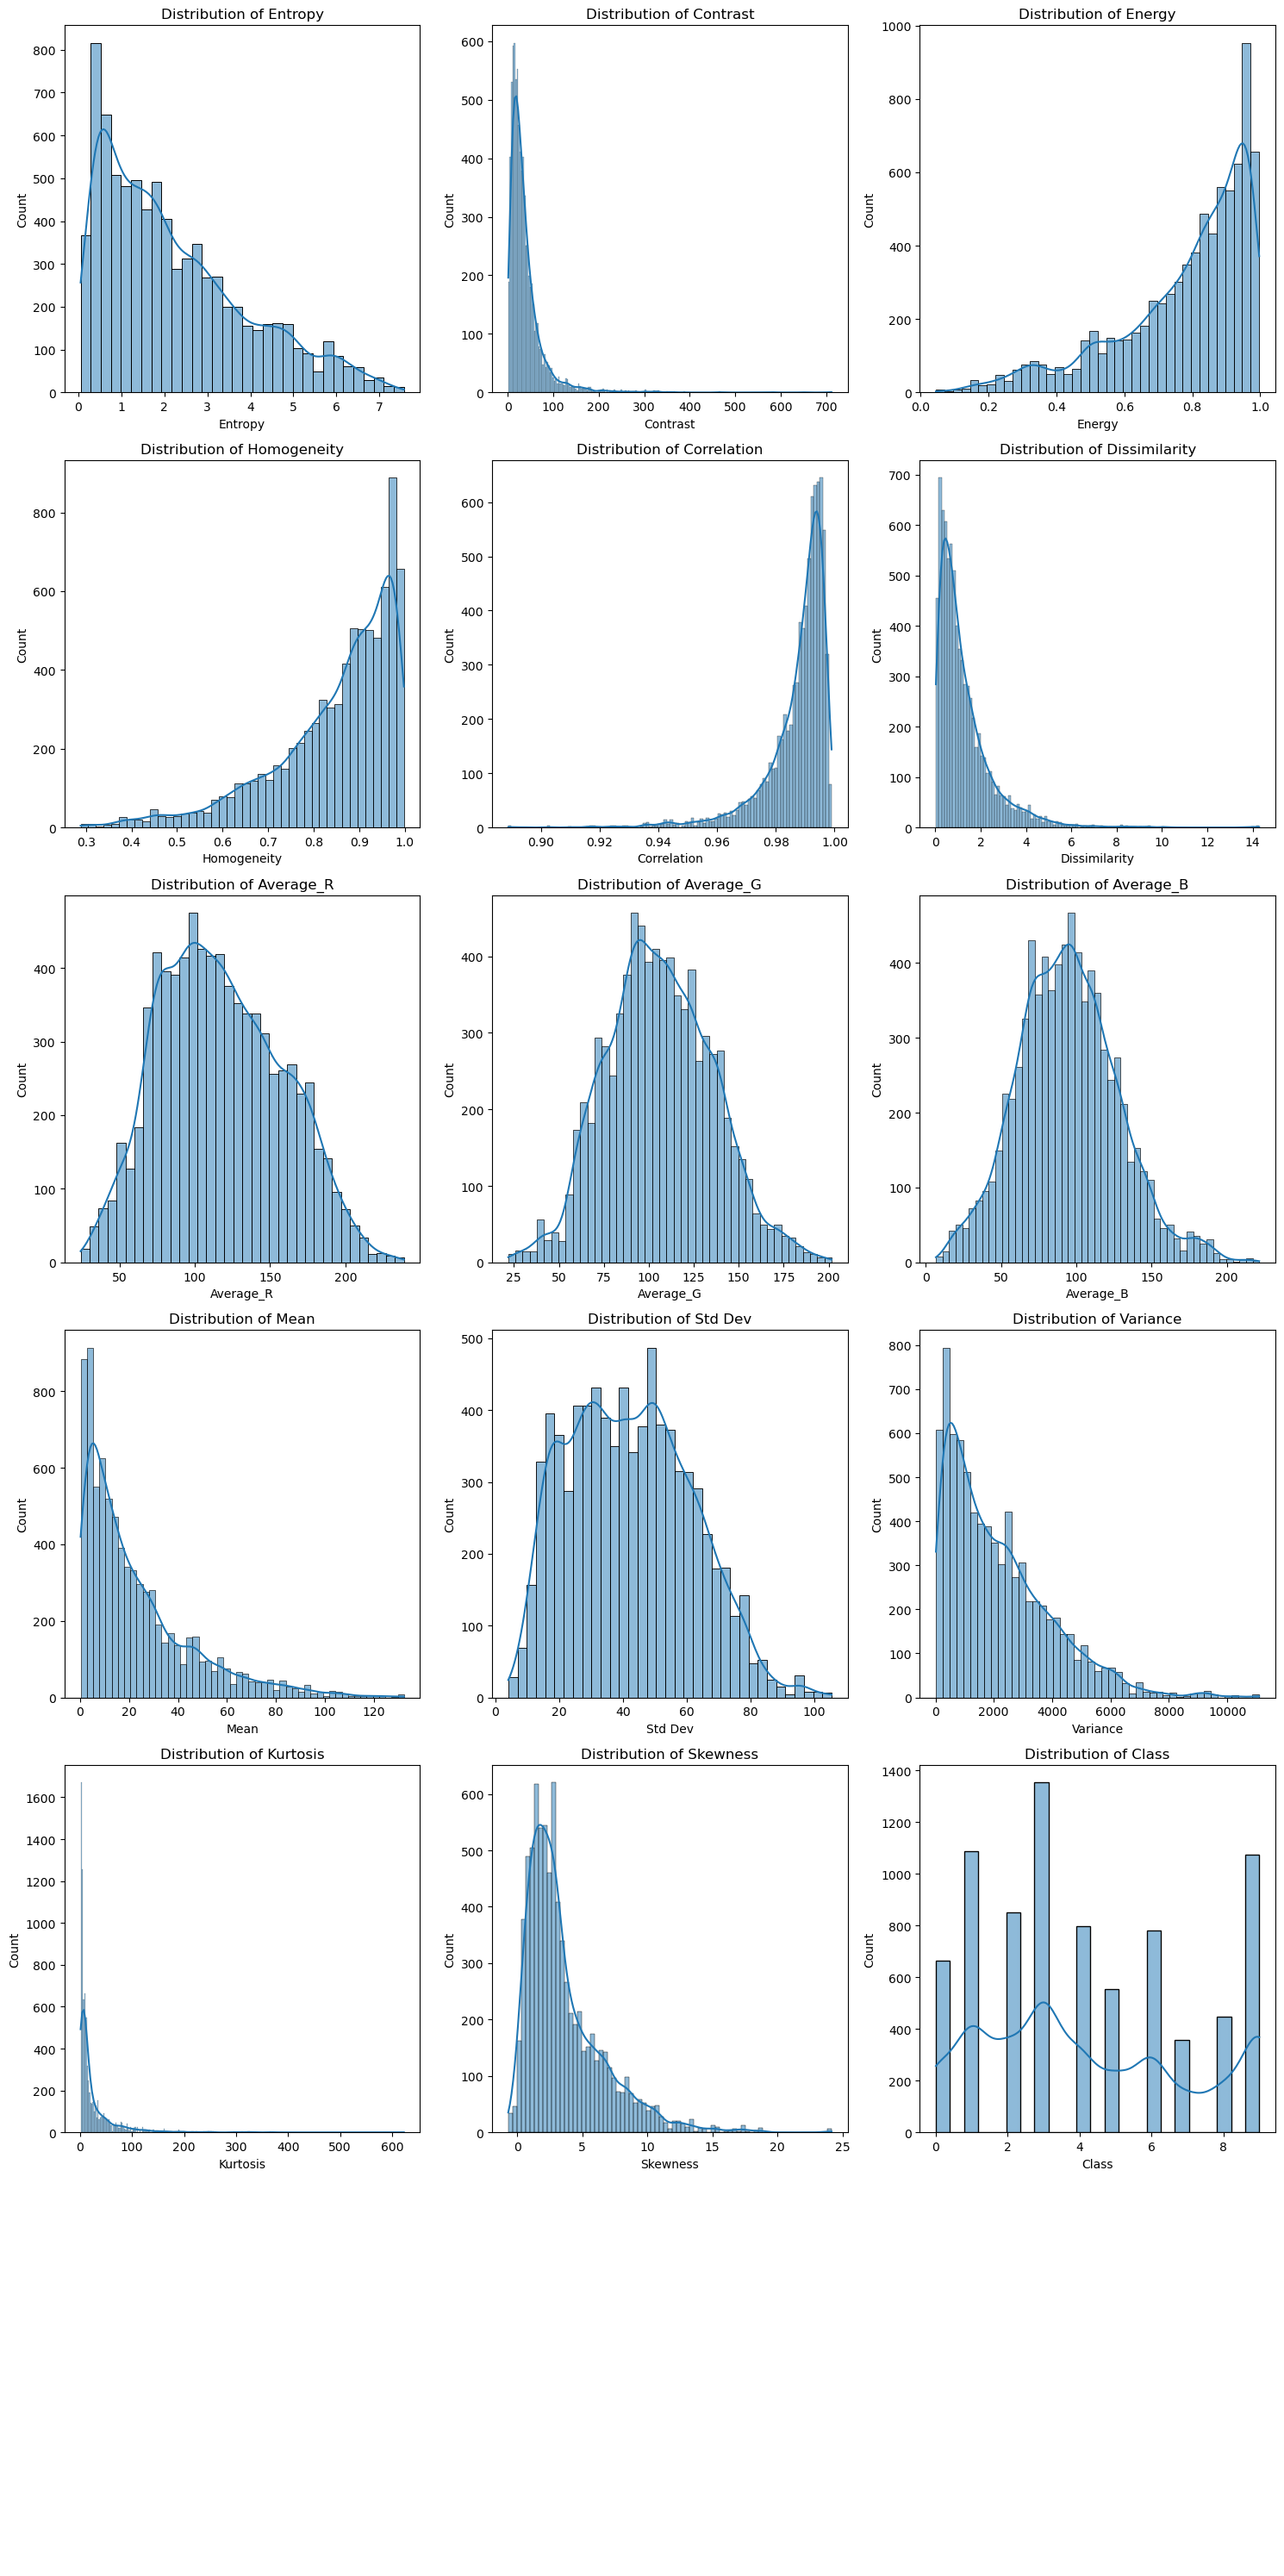

In [41]:
# Visualize feature distributions for train data
num_features = train_df.shape[1]
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))
axes = axes.flatten()
for i, col in enumerate(train_df.columns):
    sns.histplot(train_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.savefig('train_feature_histograms.png') 
plt.show()

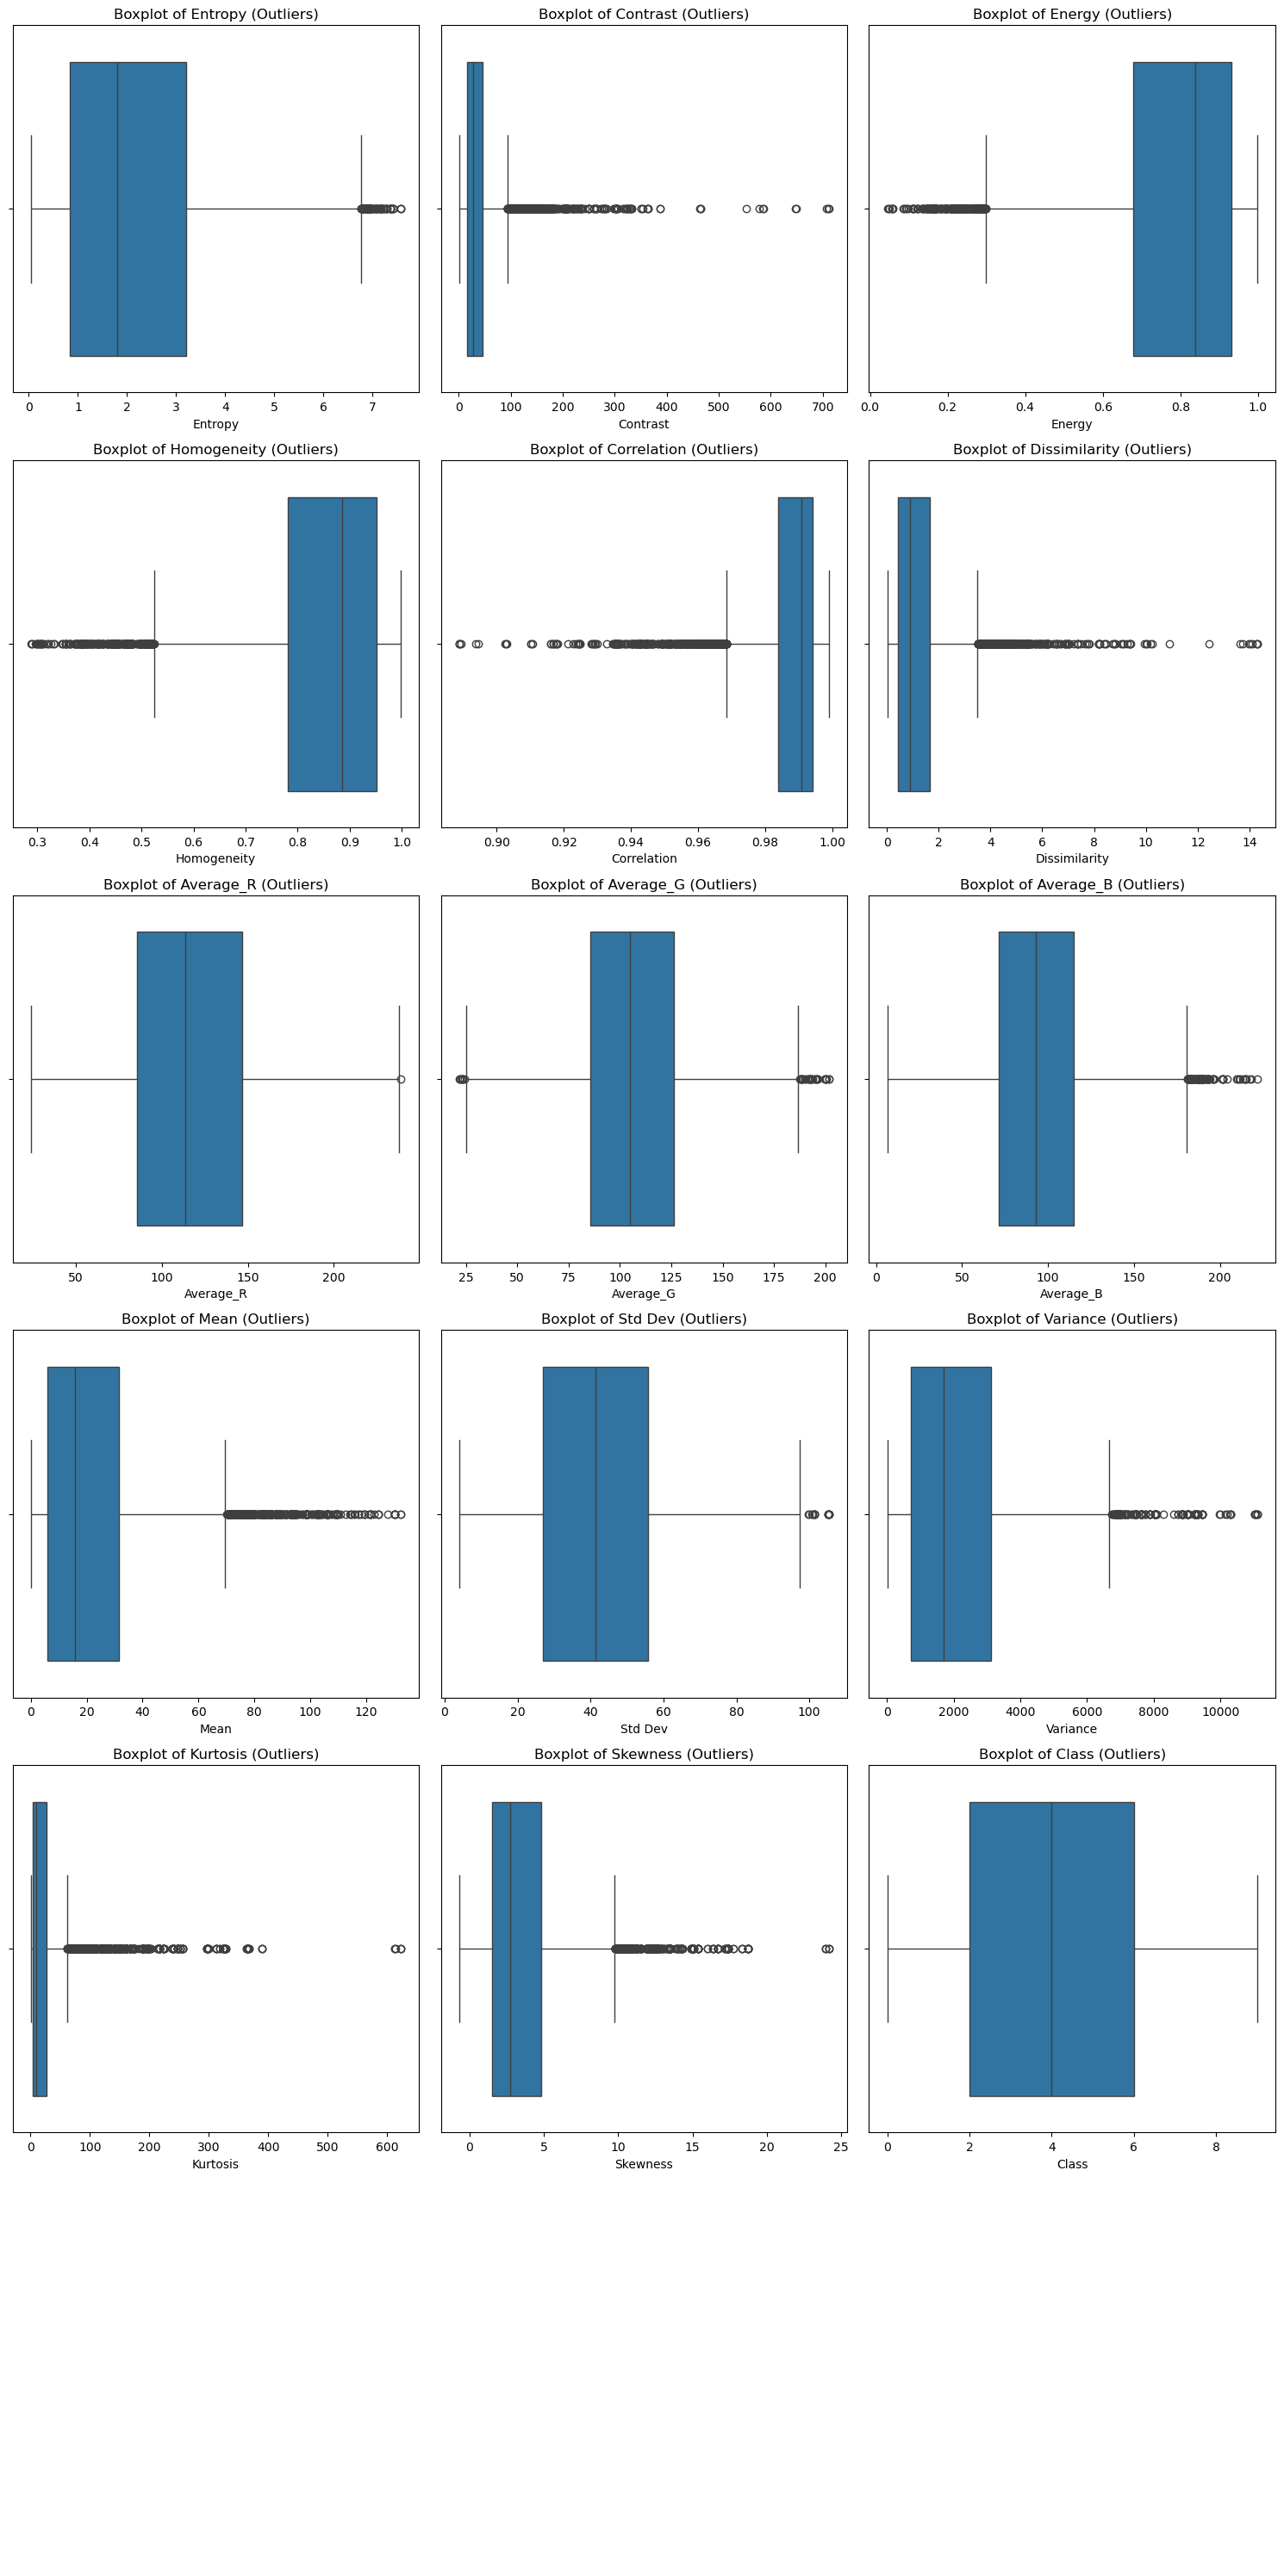

In [42]:
# Visualize outliers
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))
axes = axes.flatten()
for i, col in enumerate(train_df.columns):
    sns.boxplot(x=train_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} (Outliers)')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.savefig('train_feature_boxplots.png')
plt.show()

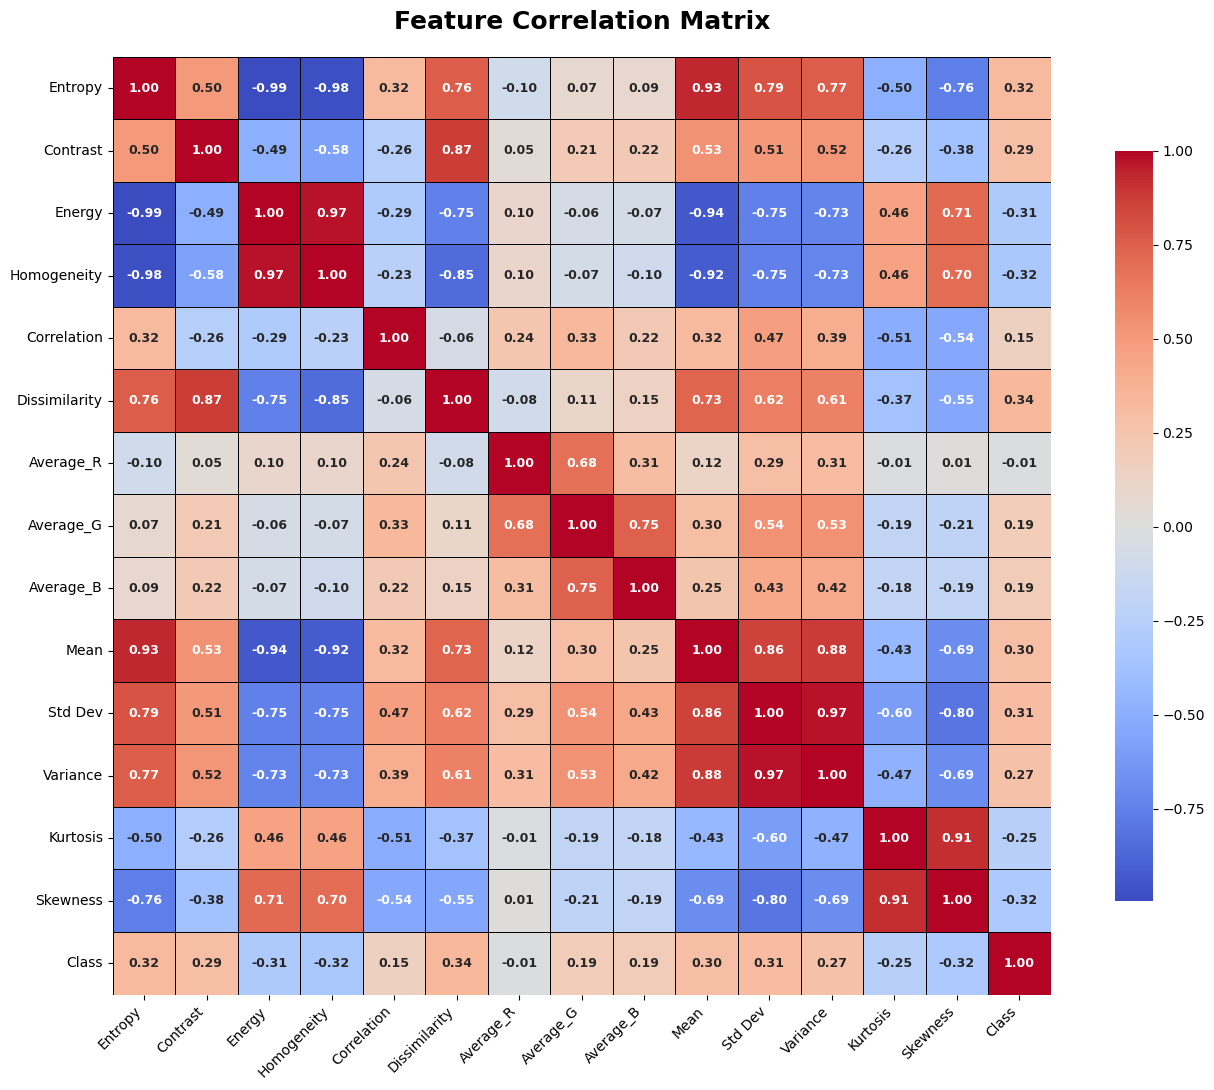

In [43]:
plt.figure(figsize=(14, 11))  # Slightly larger for readability
corr_matrix = train_df.corr()

# # Generate a mask for the upper triangle (optional – makes it cleaner)
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap with values
sns.heatmap(
    corr_matrix,
    # mask=mask,
    annot=True,                    # This adds the actual correlation values
    fmt='.2f',                     # Show 2 decimal places
    cmap='coolwarm',
    center=0,
    linewidths=0.7,
    linecolor='black',
    cbar_kws={"shrink": .8},
    square=True,
    annot_kws={"size": 9, "weight": "bold"}  # Make numbers bold and readable
)

plt.title('Feature Correlation Matrix', fontsize=18, pad=20, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Save high-quality image for your report
plt.savefig('train_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

EXPLORING THE TEST DATASET

In [44]:
test_df.head()

,Entropy,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,Average_R,Average_G,Average_B,Mean,Std Dev,Variance,Kurtosis,Skewness,Class
0,1.641048,21.298954,0.854724,0.894968,0.994461,0.784524,109.993684,117.165172,111.432118,15.950725,43.696867,1909.416164,8.954655,2.671629,4
1,3.099377,88.727301,0.707088,0.756780,0.987271,3.321886,84.990475,122.717125,129.802428,31.644975,57.647066,3323.184177,4.044150,1.582447,6
2,0.574078,34.292270,0.954305,0.964812,0.973375,0.573066,120.523451,115.437871,82.574920,4.157231,25.250791,637.602431,46.907995,6.543108,0
3,3.304441,38.349288,0.656647,0.735265,0.989352,2.065927,80.950848,82.453702,70.690308,26.877375,42.294806,1788.850621,3.658278,1.304047,9
4,7.050150,27.358681,0.148409,0.441300,0.996397,2.850451,104.090945,98.557915,94.759278,84.314692,61.898421,3831.414561,2.567890,0.524374,4


In [45]:
test_df.shape

(1992, 15)

In [46]:
test_df.isnull().sum()

Entropy          0
Contrast         0
Energy           0
Homogeneity      0
Correlation      0
Dissimilarity    0
Average_R        0
Average_G        0
Average_B        0
Mean             0
Std Dev          0
Variance         0
Kurtosis         0
Skewness         0
Class            0
dtype: int64

In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entropy        1992 non-null   float64
 1   Contrast       1992 non-null   float64
 2   Energy         1992 non-null   float64
 3   Homogeneity    1992 non-null   float64
 4   Correlation    1992 non-null   float64
 5   Dissimilarity  1992 non-null   float64
 6   Average_R      1992 non-null   float64
 7   Average_G      1992 non-null   float64
 8   Average_B      1992 non-null   float64
 9   Mean           1992 non-null   float64
 10  Std Dev        1992 non-null   float64
 11  Variance       1992 non-null   float64
 12  Kurtosis       1992 non-null   float64
 13  Skewness       1992 non-null   float64
 14  Class          1992 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 233.6 KB


In [48]:
test_df.describe()

,Entropy,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,Average_R,Average_G,Average_B,Mean,Std Dev,Variance,Kurtosis,Skewness,Class
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,2.220798,37.962028,0.777338,0.847148,0.986775,1.260722,115.082469,104.975337,94.024449,22.901327,41.972269,2134.567000,26.776898,3.670134,4.137550
std,1.667066,41.617208,0.194940,0.132878,0.012401,1.256133,40.053960,30.459220,33.444579,22.371729,19.315356,1779.008026,47.880306,3.156420,2.848803
min,0.050684,1.232365,0.045909,0.292997,0.886702,0.028408,24.330147,25.049489,6.854060,0.184231,4.048157,16.387578,1.437430,-0.480700,0.000000
25%,0.852144,15.227269,0.680803,0.784732,0.983983,0.438787,84.815778,83.708603,71.066798,6.152789,26.256882,689.423874,4.156075,1.512468,2.000000
50%,1.790236,26.212465,0.838519,0.884906,0.990714,0.892415,111.174294,103.458357,92.921539,15.803025,41.439929,1717.267752,9.621985,2.712113,4.000000
75%,3.215092,45.585878,0.931495,0.951031,0.994359,1.647581,144.150040,124.502033,113.949148,31.567859,55.990759,3134.965201,28.672604,4.949227,6.000000
max,7.569718,648.318676,0.996586,0.997681,0.998625,14.176786,234.495059,219.368244,202.163679,132.280397,105.321680,11092.656370,622.767233,24.164590,9.000000


In [50]:
test_df.duplicated().sum()

0

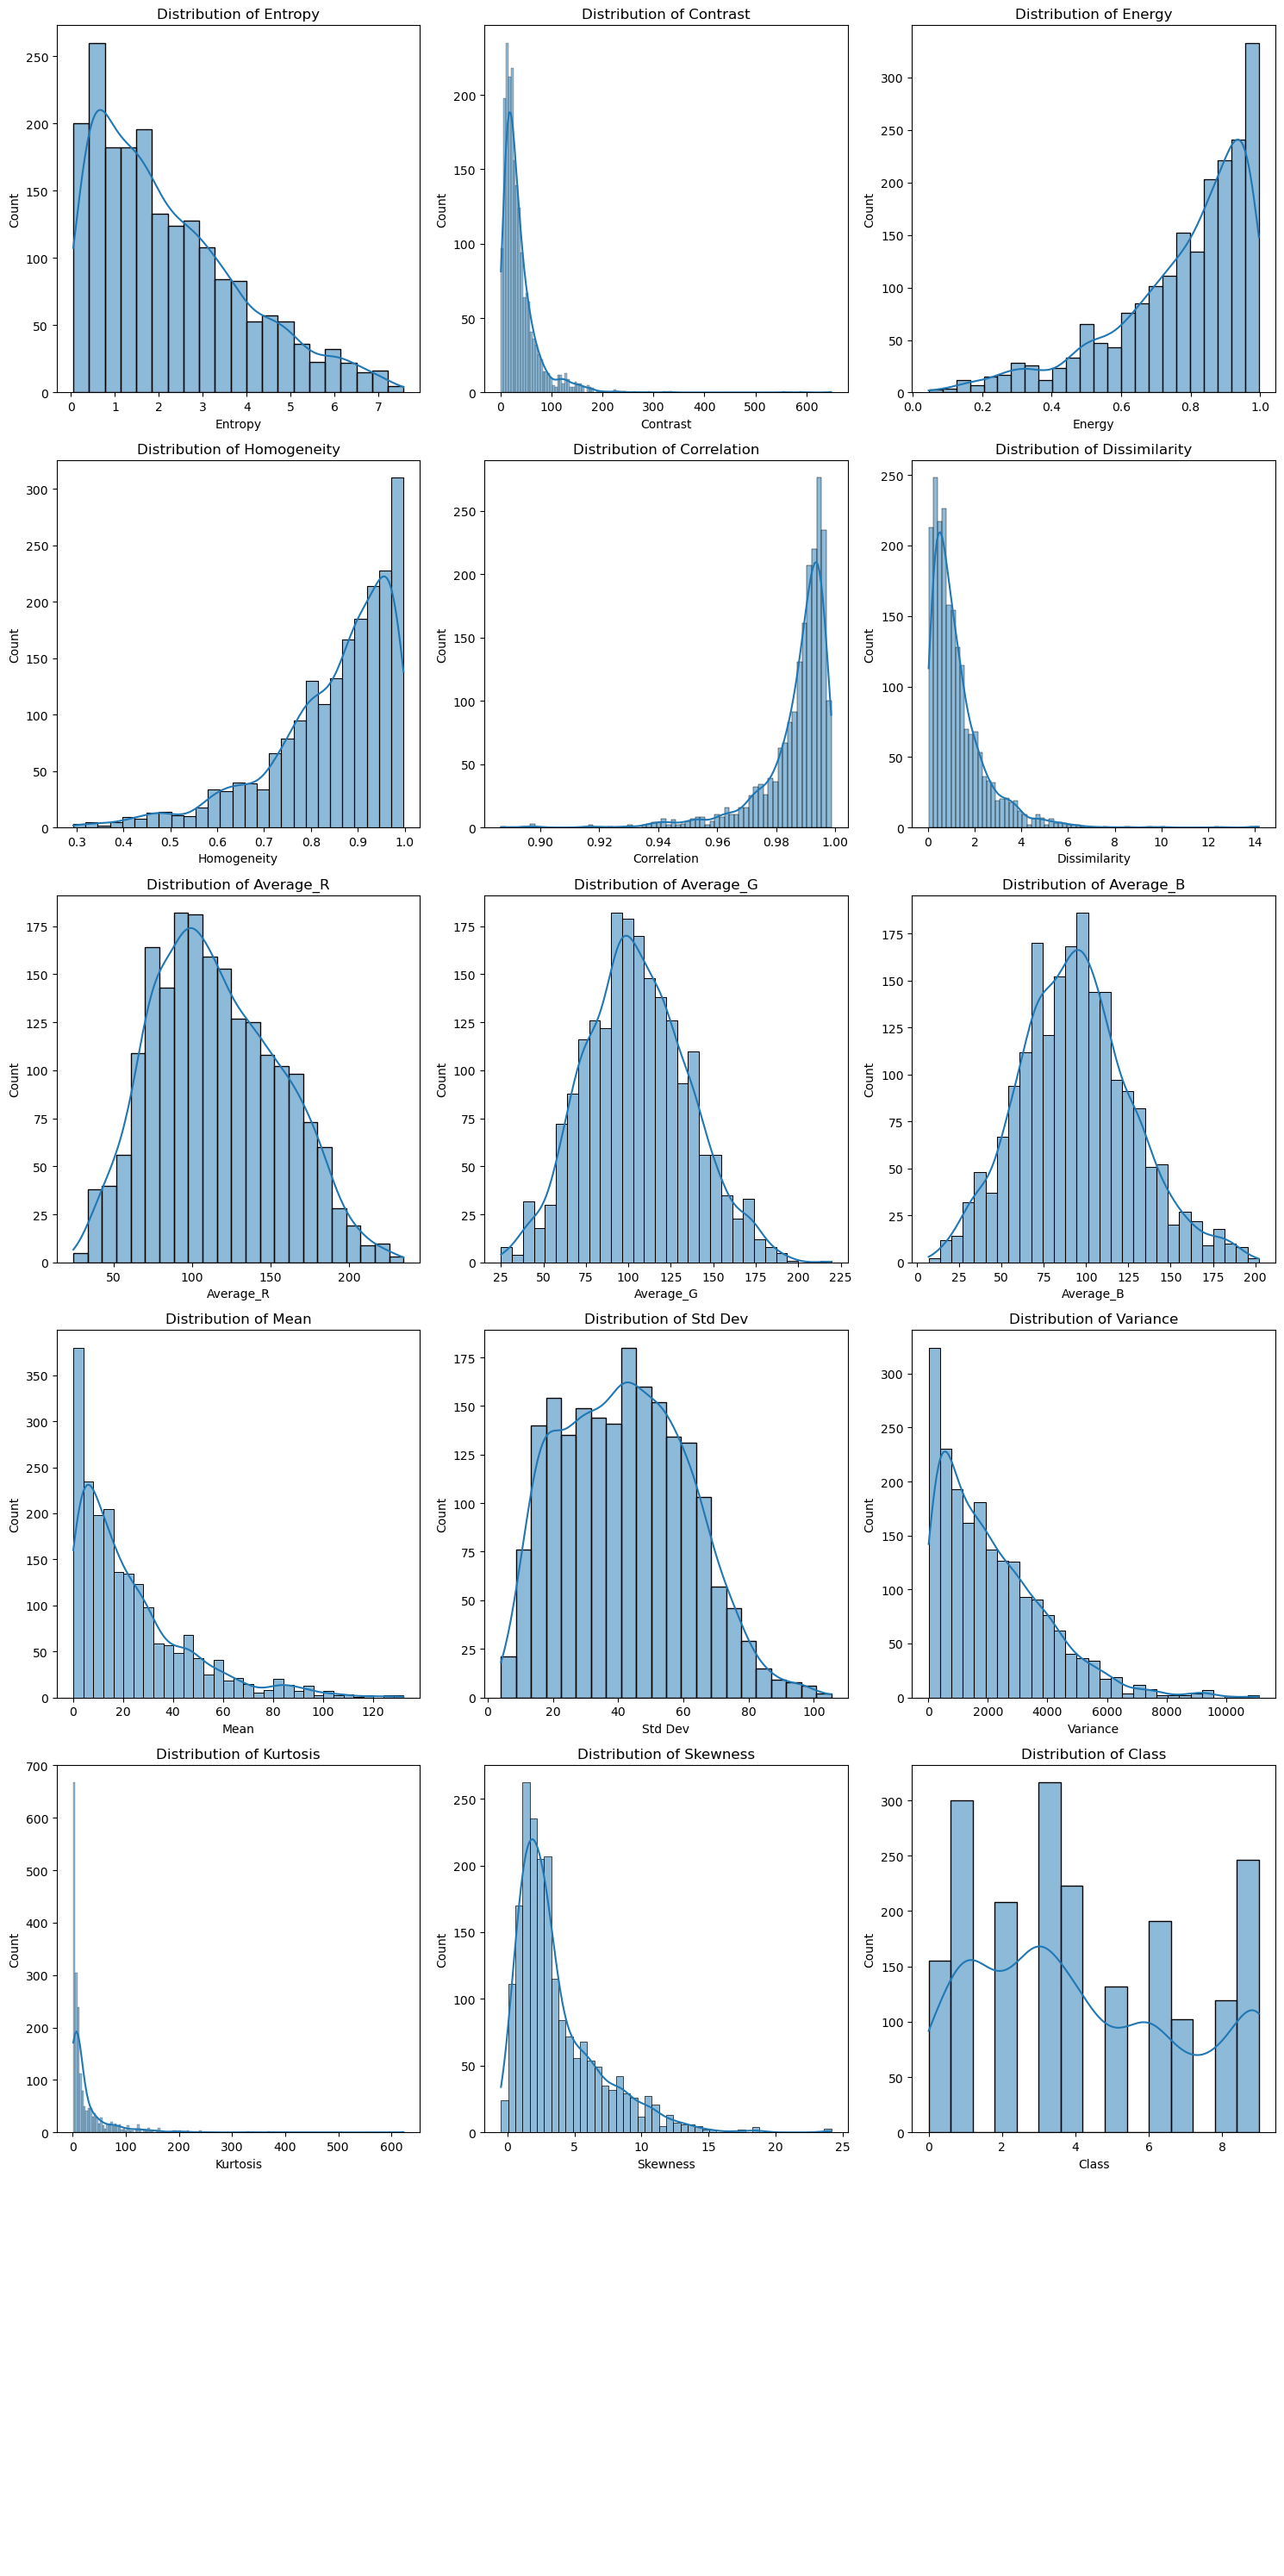

In [51]:
# Visualize feature distributions (histograms)
num_features = test_df.shape[1]
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))
axes = axes.flatten()
for i, col in enumerate(test_df.columns):
    sns.histplot(test_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.savefig('test_feature_histograms.png') 
plt.show()

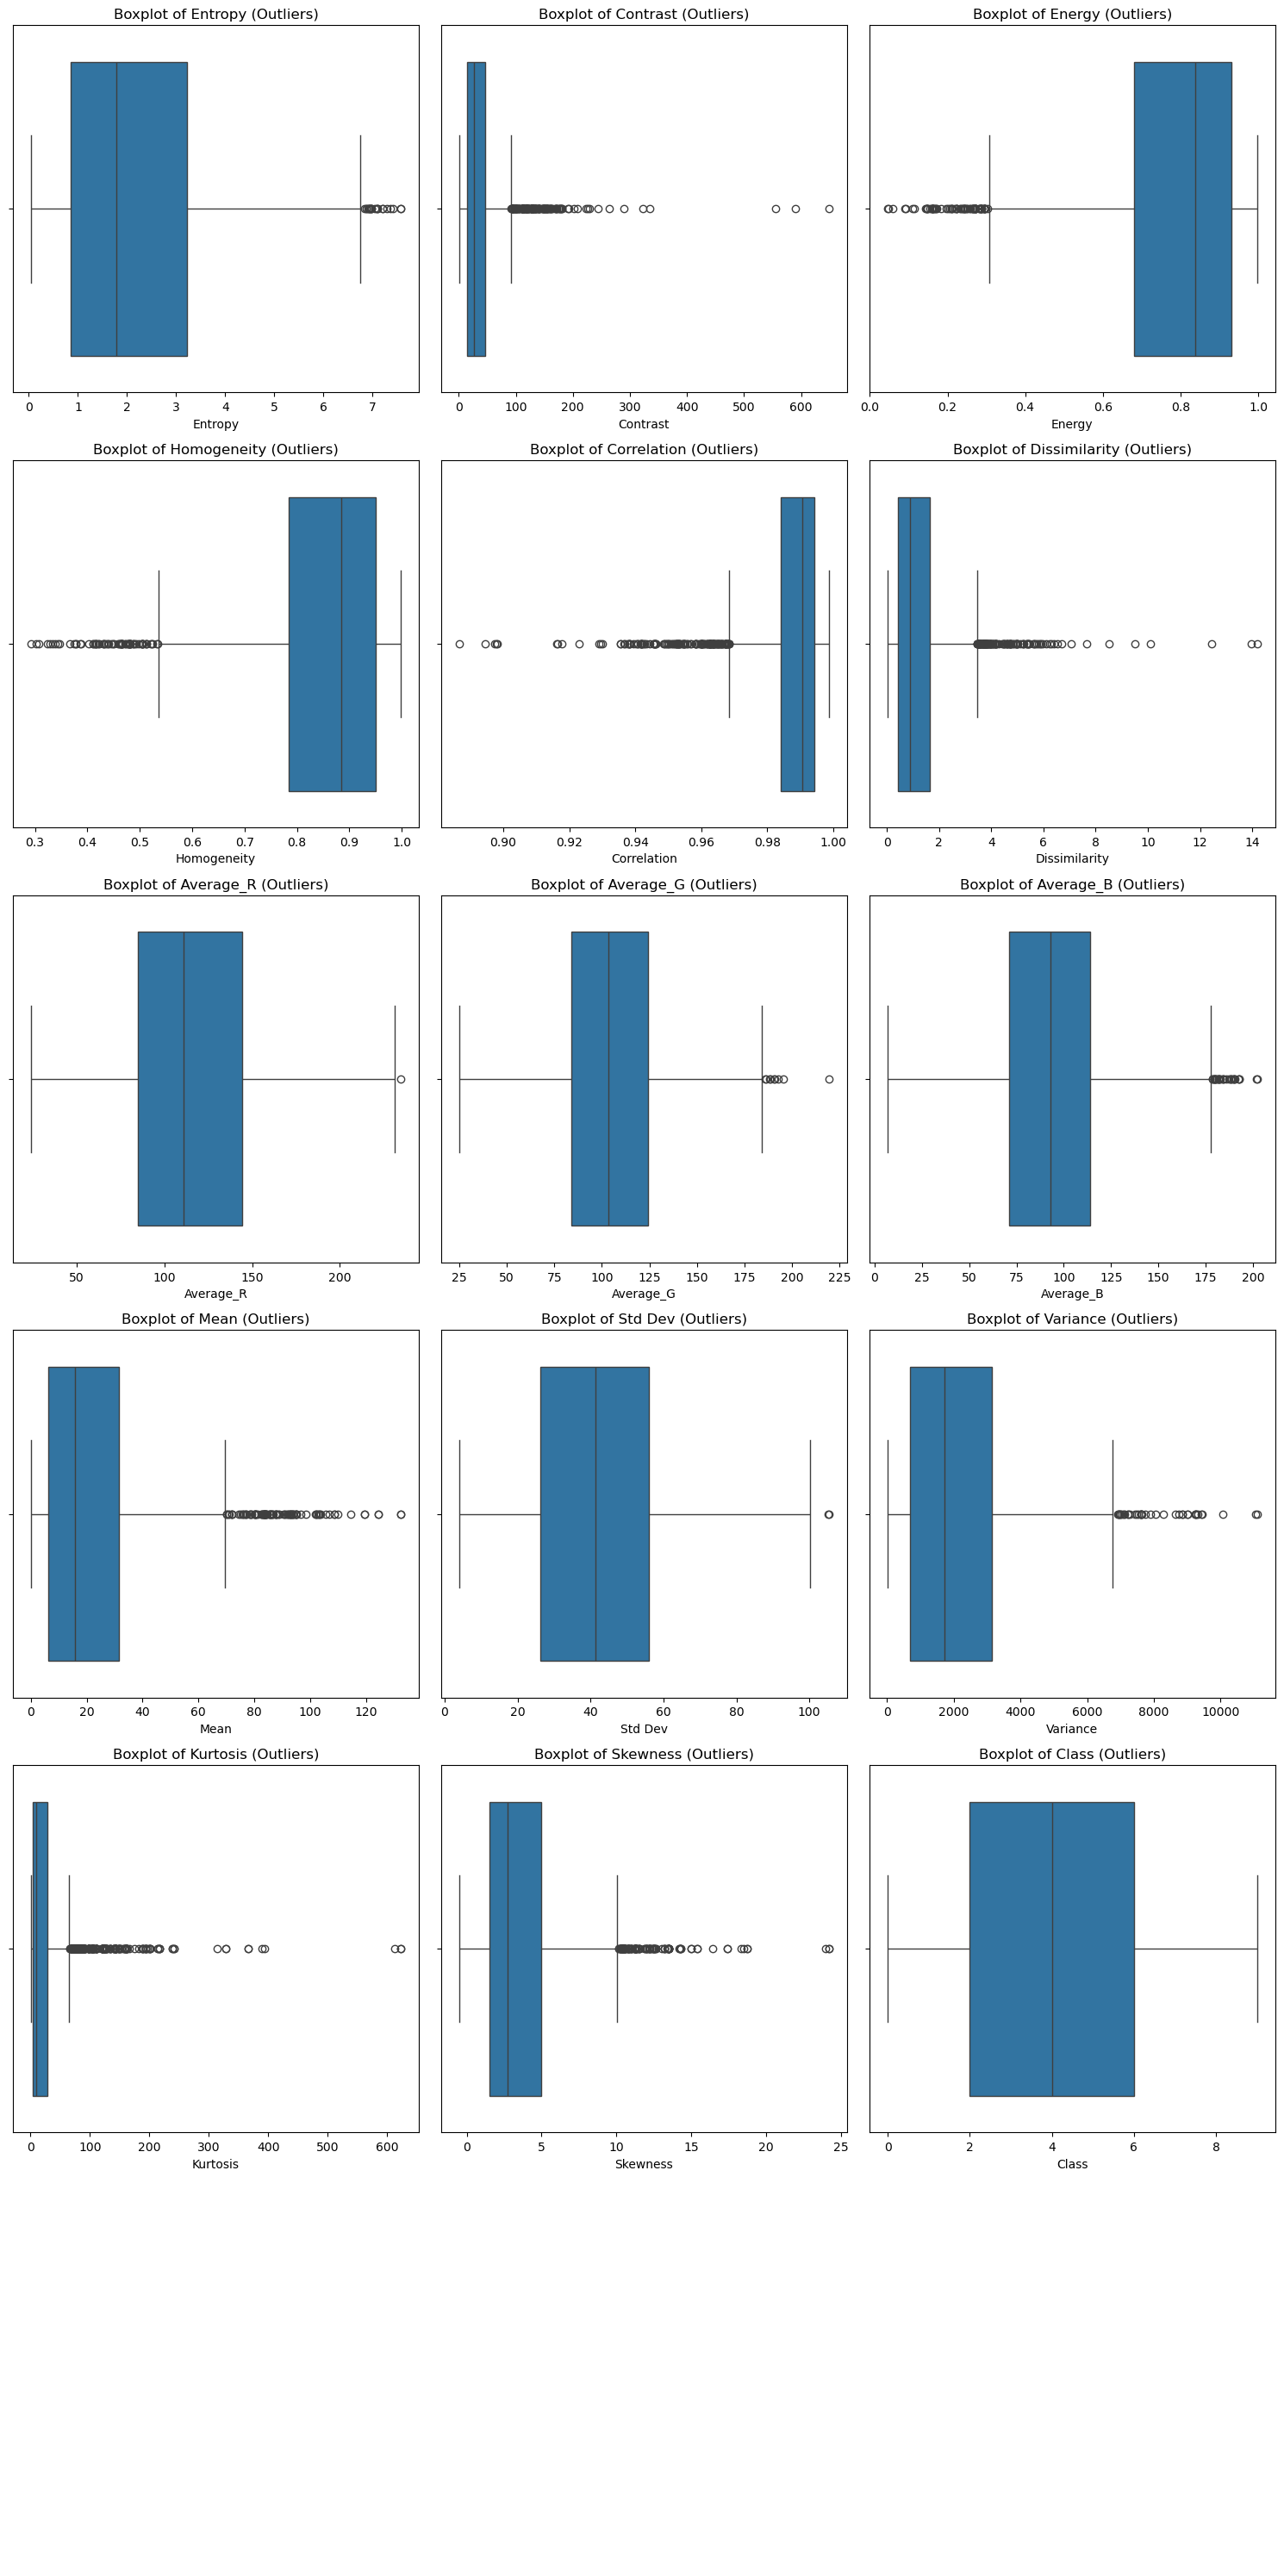

In [52]:
# Visualize outliers (boxplots)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))
axes = axes.flatten()
for i, col in enumerate(test_df.columns):
    sns.boxplot(x=test_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} (Outliers)')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.savefig('test_feature_boxplots.png')
plt.show()

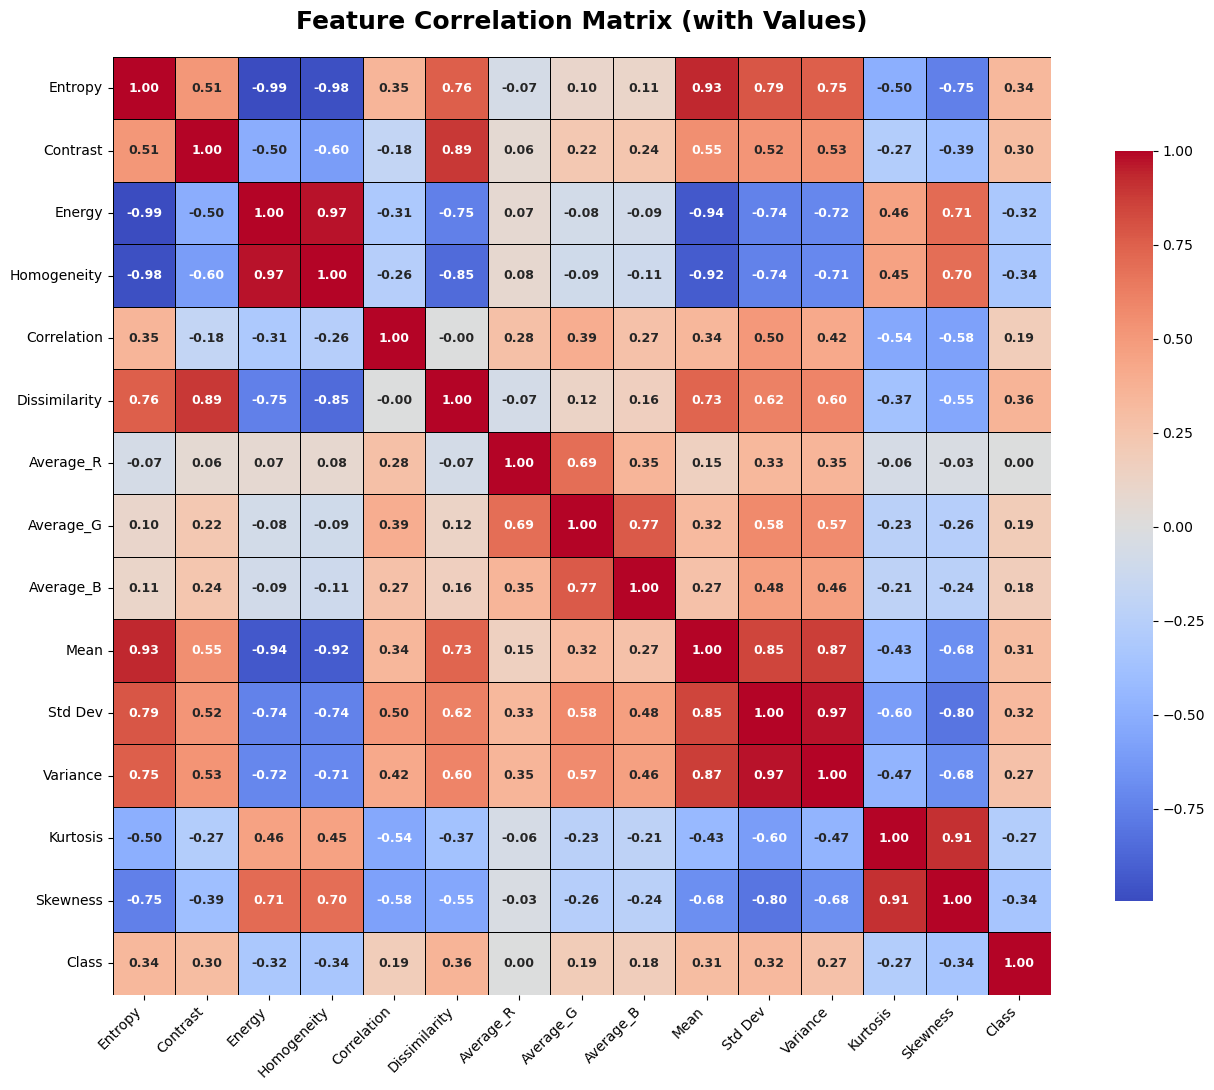

In [53]:
plt.figure(figsize=(14, 11))  # Slightly larger for readability
corr_matrix = test_df.corr()

# # Generate a mask for the upper triangle (optional – makes it cleaner)
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap with values
sns.heatmap(
    corr_matrix,
    # mask=mask,
    annot=True,                    # This adds the actual correlation values
    fmt='.2f',                     # Show 2 decimal places
    cmap='coolwarm',
    center=0,
    linewidths=0.7,
    linecolor='black',
    cbar_kws={"shrink": .8},
    square=True,
    annot_kws={"size": 9, "weight": "bold"}  # Make numbers bold and readable
)

plt.title('Feature Correlation Matrix (with Values)', fontsize=18, pad=20, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Save high-quality image for your report
plt.savefig('test_correlation_heatmap', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
# Separate features and target (assuming last column is label)
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [56]:
# =============================================
# ROBUST OUTLIER CAPPING + SCALING (NO ERRORS!)
# =============================================

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

def cap_outliers_iqr(df, multiplier=1.5, verbose=True):
    """
    Caps outliers using IQR method. Works on DataFrame only.
    """
    df_capped = train_df.copy()
    capped_count = 0
    
    for col in df_capped.select_dtypes(include=[np.number]).columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        
        outliers = ((df_capped[col] < lower) | (df_capped[col] > upper)).sum()
        capped_count += outliers
        
        df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)
        
        if verbose and outliers > 0:
            print(f"{col:30} | Capped: {outliers:4} values | Bounds: [{lower:.3f}, {upper:.3f}]")
    
    if verbose:
        print(f"\nTotal capped values: {capped_count} ({100*capped_count/df.size:.2f}% of data)\n")
    
    return df_capped

# === STEP 1: Reload data safely (ensures only features are used) ===
train_df = pd.read_csv('fish_disease_train.csv')
test_df  = pd.read_csv('fish_disease_test.csv')

# Explicitly drop the target column if it's accidentally included in features
if 'Class' in train_df.columns:
    y_train = train_df['Class']
    X_train = train_df.drop('Class', axis=1)
else:
    # Assuming last column is label (as per question)
    y_train = train_df.iloc[:, -1]
    X_train = train_df.iloc[:, :-1]

if 'Class' in test_df.columns:
    y_test = test_df['Class']
    X_test = test_df.drop('Class', axis=1)
else:
    y_test = test_df.iloc[:, -1]
    X_test = test_df.iloc[:, :-1]

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"Feature names (first 5): {X_train.columns[:5].tolist()}")

# === STEP 2: Apply outlier capping ===
print("Applying outlier capping (IQR method)...")
X_train_capped = cap_outliers_iqr(X_train, multiplier=1.5)

# Apply SAME bounds to test set (no data leakage)
X_test_capped = X_train.copy()  # Use training bounds only
for col in X_train.columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X_test_capped[col] = X_test[col].clip(lower=lower, upper=upper)

# === STEP 3: Scale using ONLY feature column names (this fixes the error forever) ===
scaler = StandardScaler()

# Fit scaler on capped training data
X_train_scaled = scaler.fit_transform(X_train_capped)

# Transform test data using the same scaler (no feature name issues!)
X_test_scaled = scaler.transform(X_test_capped)

print("Outlier capping and scaling completed successfully!")
print(f"Final shapes -> X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")

# Optional: Save cleaned versions for report
X_train_capped.to_csv('X_train_cleaned.csv', index=False)
X_test_capped.to_csv('X_test_cleaned.csv', index=False)

X_train shape: (7967, 14), X_test shape: (1992, 14)
Feature names (first 5): ['Entropy', 'Contrast', 'Energy', 'Homogeneity', 'Correlation']
Applying outlier capping (IQR method)...
Entropy                        | Capped:   84 values | Bounds: [-2.716, 6.767]
Contrast                       | Capped:  526 values | Bounds: [-31.736, 93.371]
Energy                         | Capped:  251 values | Bounds: [0.299, 1.312]
Homogeneity                    | Capped:  286 values | Bounds: [0.524, 1.208]
Correlation                    | Capped:  502 values | Bounds: [0.969, 1.010]
Dissimilarity                  | Capped:  491 values | Bounds: [-1.407, 3.505]
Average_R                      | Capped:    1 values | Bounds: [-5.837, 238.405]
Average_G                      | Capped:   41 values | Bounds: [24.488, 187.316]
Average_B                      | Capped:  102 values | Bounds: [5.339, 180.843]
Mean                           | Capped:  418 values | Bounds: [-32.328, 69.905]
Std Dev               

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Class


In [ ]:
# Scale features (important for some models like KNN and PCA; do after exploration to avoid altering raw views)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Data exploration
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Class distribution in train:", y_train.value_counts())

# Check for missing values
print("Missing values in train:", train_df.isnull().sum().sum())

# Scale features (important for some models like KNN and PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.xlabel('Disease Class')
plt.ylabel('Count')
plt.show()